In [3]:
using Plots
using Statistics
using JSON
using Dates
using HTTP

In [4]:
# setting the backend 
#plotlyjs(); 
gr();

In [6]:
include("covidplotutils.jl");

In [7]:
data = JSON.parse(String(HTTP.request("GET", "https://pomber.github.io/covid19/timeseries.json").body));

In [8]:
country_list=["Egypt", "US", "Sweden", "Italy","Spain","United Kingdom"]
c_data=[extract_country_data(c, data) for c in country_list];

# Death Comparison

In [9]:
death_threshold=30
start_point=[findfirst(x->x>=death_threshold,c_data[i][:deaths]) for i in eachindex(c_data)];
country_filtered_death=[@view c_data[i][:deaths][start_point[i]:end] for i in eachindex(c_data)];

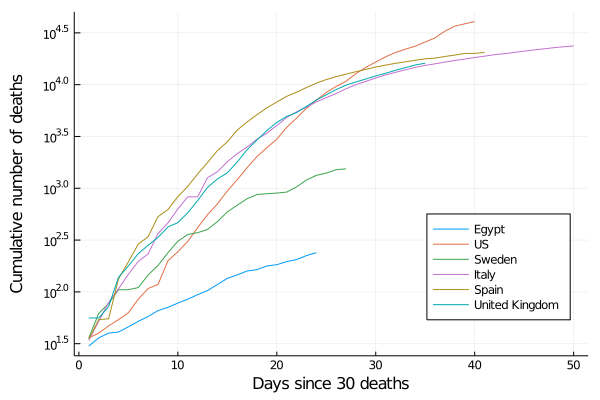

In [10]:
plot(country_filtered_death, 
     yscale=:log10,
    labels=reshape(country_list,1,:), legend=:bottomright, 
     xlabel="Days since $death_threshold deaths", 
     ylabel="Cumulative number of deaths")

In [11]:
country_models=[segmented_models(country_filtered_death[i]) for i in eachindex(c_data)];

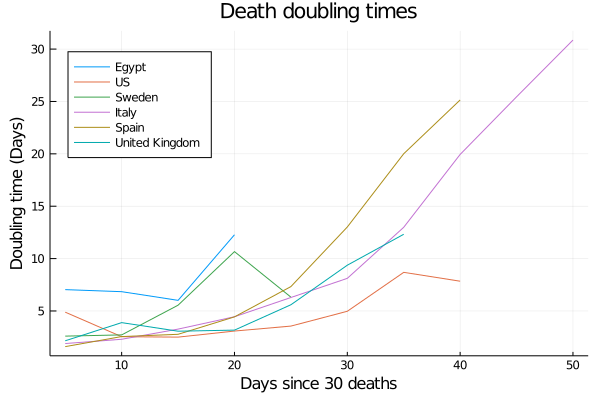

In [13]:
plts=[plot_doubling_times(country_filtered_death[i],country_models[i][:v_interval],
        country_models[i][:segments],
        maximum(eachindex.(country_filtered_death)), 
        "Deaths", st=:line) for i in eachindex(c_data)]
p=plot(title="Death doubling times",
    xlabel="Days since $death_threshold deaths",
    ylabel="Doubling time (Days)", legend=:topleft)
for i in eachindex(plts)
    c_p=plts[i]
    interval=length(country_models[i][:segments][1])
    x_values=(c_p.series_list[1][:x])*interval
    y_values=c_p.series_list[1][:y]
    plot!(p, x_values, y_values, labels=country_list[i])
end
p

# Confirmed Cases Comparsion

In [14]:
confirmed_threshold=50
start_point=[findfirst(x->x>=confirmed_threshold,c_data[i][:confirmed]) for i in eachindex(c_data)];
country_filtered_confirmed=[@view c_data[i][:confirmed][start_point[i]:end] for i in eachindex(c_data)];

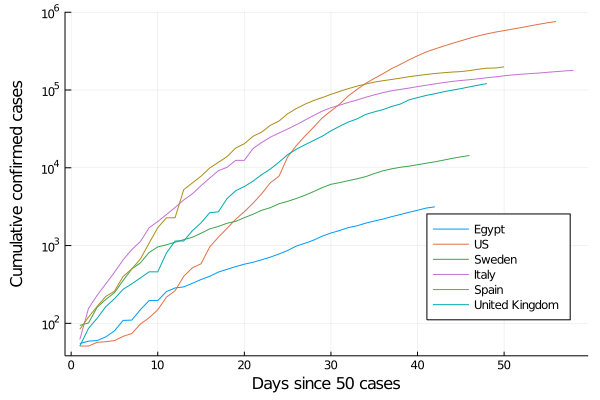

In [15]:
plot(country_filtered_confirmed, 
     yscale=:log10,
    labels=reshape(country_list,1,:), legend=:bottomright, 
     xlabel="Days since $confirmed_threshold cases", 
     ylabel="Cumulative confirmed cases")

In [16]:
country_models=[segmented_models(country_filtered_confirmed[i]) for i in eachindex(c_data)];

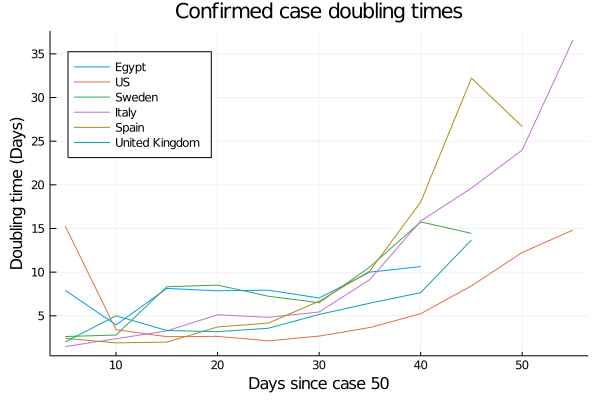

In [17]:
plts=[plot_doubling_times(country_filtered_confirmed[i],country_models[i][:v_interval],
        country_models[i][:segments],
        maximum(eachindex.(country_filtered_confirmed)), 
        "Deaths", st=:line) for i in eachindex(c_data)]
p=plot(title="Confirmed case doubling times", 
    xlabel="Days since case $confirmed_threshold",
    ylabel="Doubling time (Days)",legend=:topleft)
for i in eachindex(plts)
    c_p=plts[i]
    interval=length(country_models[i][:segments][1])
    x_values=(c_p.series_list[1][:x])*interval
    y_values=c_p.series_list[1][:y]
    plot!(p,x_values ,y_values, labels=country_list[i])
end
p